<a href="https://colab.research.google.com/github/s-1-n-t-h/Data-Science-Lab/blob/main/Project_Amazon_User_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project: Amazon User Segmentation

## Problem Statement
### Identify users with simliar purchase bahviour using Amazon Customer Purchase Rating data.

* The data contains the following features/ attributes:

    * Customer ID

    * Sex / Gender

    * Age

    * Income

    * Rating

## Solution:

* The problem requires Segmentation of Users, which can be done using Clustering Algorithms.

* Some of the Clustering Algorithms available are:
    
    * K - Means Clustering

    * Hierarchical Clustering

## Importing libraries

In [ ]:
# data handling libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,LabelEncoder

In [ ]:
# machine learning libraries
from sklearn.cluster import KMeans
from scipy.cluster import hierarchy
from sklearn.cluster import AgglomerativeClustering

## Importing dataset

In [ ]:
dataset = pd.read_excel('Amazon User Segmentation.xls')

In [ ]:
dataset

,Cus_ID,Sex,Age,Income,Rating
0,301219,M,23,306555,44
1,301220,F,26,306555,91
2,301221,F,24,326992,7
3,301222,M,28,326992,87
4,301223,F,38,347429,45
...,...,...,...,...,...
195,301414,F,42,2452440,89
196,301415,F,54,2575062,32
197,301416,M,39,2575062,83
198,301417,M,39,2799869,21


In [ ]:
X = dataset.iloc[:,[2,4]].values

In [ ]:
X

array([[ 23,  44],
       [ 26,  91],
       [ 24,   7],
       [ 28,  87],
       [ 38,  45],
       [ 27,  86],
       [ 42,   7],
       [ 28, 106],
       [ 77,   4],
       [ 36,  81],
       [ 81,  16],
       [ 42, 111],
       [ 70,  17],
       [ 29,  87],
       [ 45,  15],
       [ 27,  89],
       [ 42,  40],
       [ 24,  74],
       [ 63,  33],
       [ 42, 110],
       [ 42,  40],
       [ 30,  82],
       [ 56,   6],
       [ 38,  82],
       [ 65,  16],
       [ 35,  92],
       [ 54,  36],
       [ 42,  69],
       [ 48,  35],
       [ 28,  98],
       [ 72,   5],
       [ 26,  82],
       [ 64,   5],
       [ 22, 104],
       [ 59,  16],
       [ 26,  91],
       [ 51,  20],
       [ 36,  82],
       [ 44,  30],
       [ 24,  84],
       [ 78,  40],
       [ 29, 104],
       [ 58,  41],
       [ 38,  69],
       [ 59,  32],
       [ 29,  73],
       [ 60,  62],
       [ 33,  53],
       [ 35,  48],
       [ 38,  48],
       [ 59,  59],
       [ 40,  68],
       [ 38,

# K-Means Clustering -- Age vs Rating

## Feature Scaling

## Optimal number of clusters via Elbow Method

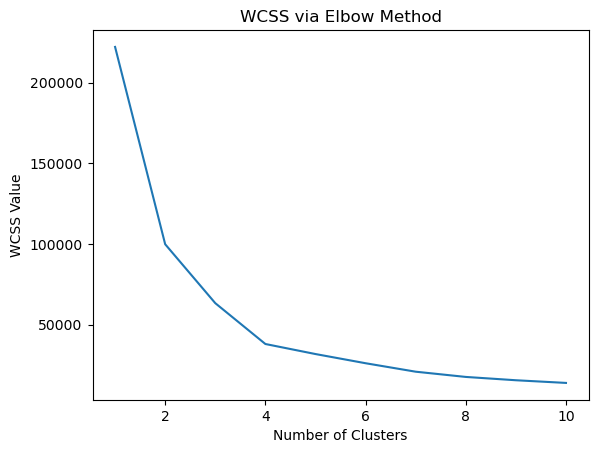

In [ ]:
# With-in CLuster Sum of Squares -WCSS is the sum of squared distance between each point and the centroid in a cluster.
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title('WCSS via Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS Value')
plt.show()

* No much deviation after number of cluster chosen are >=6

## K Means Model Training on Training set

In [ ]:
kmeans = KMeans(n_clusters=4, init='k-means++',random_state=0)

## Predicting

In [ ]:
y_means = kmeans.fit_predict(X)


## Predicting results

In [ ]:
y_means

array([3, 0, 2, 0, 3, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 3, 3, 2, 0, 3, 0,
       2, 0, 2, 0, 2, 3, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 1, 0, 1, 3,
       2, 3, 1, 3, 3, 3, 1, 3, 3, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 3,
       1, 1, 3, 3, 1, 1, 1, 1, 1, 3, 1, 3, 3, 1, 1, 3, 1, 1, 3, 1, 1, 3,
       3, 1, 1, 3, 1, 3, 3, 3, 1, 3, 1, 3, 3, 1, 1, 3, 1, 3, 1, 1, 1, 1,
       1, 3, 3, 3, 3, 3, 1, 1, 1, 1, 3, 3, 3, 0, 3, 0, 1, 0, 2, 0, 2, 0,
       3, 0, 2, 0, 2, 0, 2, 0, 2, 0, 3, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 3, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0], dtype=int32)

## Visualising Clusters

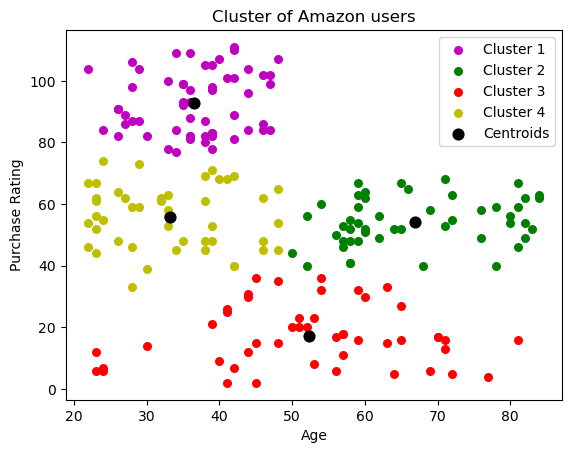

In [ ]:
plt.scatter(X[y_means==0, 0], X[y_means==0, 1],s=30, c='m', label='Cluster 1')
plt.scatter(X[y_means==1, 0],X[y_means==1,1],s=30,c='g',label='Cluster 2')
plt.scatter(X[y_means==2,0],X[y_means==2,1],s=30,c='r',label='Cluster 3')
plt.scatter(X[y_means==3,0],X[y_means==3,1],s=30,c='y',label='Cluster 4')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=60,c='black',label='Centroids')
plt.title('Cluster of Amazon users')
plt.xlabel('Age')
plt.ylabel('Purchase Rating')
plt.legend()
plt.show()


# Hierarchical Clustering -- Income vs Rating

In [ ]:
X = dataset.iloc[:,[3,4]].values

In [ ]:
X

array([[ 306555,      44],
       [ 306555,      91],
       [ 326992,       7],
       [ 326992,      87],
       [ 347429,      45],
       [ 347429,      86],
       [ 367866,       7],
       [ 367866,     106],
       [ 388303,       4],
       [ 388303,      81],
       [ 388303,      16],
       [ 388303,     111],
       [ 408740,      17],
       [ 408740,      87],
       [ 408740,      15],
       [ 408740,      89],
       [ 429177,      40],
       [ 429177,      74],
       [ 470051,      33],
       [ 470051,     110],
       [ 490488,      40],
       [ 490488,      82],
       [ 510925,       6],
       [ 510925,      82],
       [ 572236,      16],
       [ 572236,      92],
       [ 572236,      36],
       [ 572236,      69],
       [ 592673,      35],
       [ 592673,      98],
       [ 613110,       5],
       [ 613110,      82],
       [ 674421,       5],
       [ 674421,     104],
       [ 674421,      16],
       [ 674421,      91],
       [ 694858,      20],
 

## Optimal number of clusters via DendoGrams

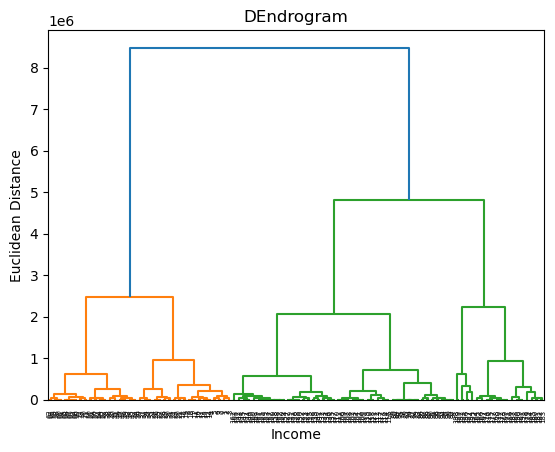

In [ ]:
dendrogram = hierarchy.dendrogram(hierarchy.linkage(X,method='ward'))
plt.title('DEndrogram')
plt.xlabel('Income')
plt.ylabel('Euclidean Distance')
plt.show()

## Hierarchical Clustering Model Training on Training set

In [ ]:
hc = AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')
y_hc = hc.fit_predict(X)

In [ ]:
y_hc

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

## Visualizing Clusters

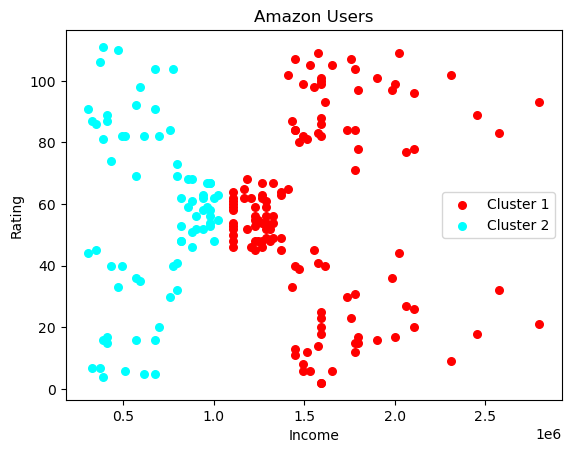

In [ ]:
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s=30, c='red', label='Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s=30, c='cyan', label='Cluster 2')

plt.title('Amazon Users')
plt.xlabel('Income')
plt.ylabel('Rating')

plt.legend()
plt.show()


* As we can see K-Menas suggests 4 Clusters of users whereas Hierarchical suggests 2 Clusters